In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/output.csv')

In [4]:
df.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.5,0.418208,0.366344,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.50,1.0,0.5
1,2,12.109011,0.000000,0.5,0.495064,0.391317,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.363636,0.25,1.0,0.5
2,3,12.317167,0.235294,0.5,0.434909,0.422359,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.727273,0.50,1.0,0.5
3,4,11.849398,0.294118,0.5,0.388581,0.390295,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.090909,0.00,1.0,0.0
4,5,12.429216,0.235294,0.5,0.513123,0.468761,0.0,0.5,0.0,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,1.000000,0.50,1.0,0.5


In [5]:
X = df.drop(['Id', 'SalePrice'], axis = 1)
y = df['SalePrice']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42, test_size=0.2)

In [21]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test:', y_test.shape)

X_train: (1168, 79)
y_train: (1168,)
X_test (292, 79)
y_test: (292,)


# Feature selection and regression


1.   Random Forest regressor
2.   Gradient Boosting regressor



In [27]:
from_sel_model = SelectFromModel(Ridge(random_state=0))
random_forest_model = RandomForestRegressor()

In [28]:
pipeline_rfr = Pipeline([
    ('feature_selection', from_sel_model),
    ('random_forest_regressor', random_forest_model)
])

In [35]:
param_grid = {
    'feature_selection__estimator__alpha': [0.1, 0.5, 1.0],
    'random_forest_regressor__n_estimators': [100, 200, 500],
    'random_forest_regressor__max_depth': [3, 5, 10]
}

grid_search = GridSearchCV(pipeline_rfr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectFromModel(estimator=Ridge(random_state=0))),
                                       ('random_forest_regressor',
                                        RandomForestRegressor())]),
             param_grid={'feature_selection__estimator__alpha': [0.1, 0.5, 1.0],
                         'random_forest_regressor__max_depth': [3, 5, 10],
                         'random_forest_regressor__n_estimators': [100, 200,
                                                                   500]},
             scoring='neg_mean_squared_error')

In [60]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'feature_selection__estimator__alpha': 0.5, 'random_forest_regressor__max_depth': 10, 'random_forest_regressor__n_estimators': 200}
Best score: -0.0224343571109351


In [37]:
from_sel_model_grid = SelectFromModel(Ridge(alpha =0.5, random_state=0))

In [39]:
from_sel_model_grid.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=0.5, random_state=0))

In [42]:
from_sel_model_grid.get_support()

array([False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False,  True, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True, False, False, False, False,  True, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
       False, False, False, False, False, False,  True])

In [45]:
selected_feat_rfr = X_train.columns[(from_sel_model_grid.get_support())]
selected_feat_rfr

Index(['MSZoning', 'LotArea', 'Utilities', 'LandSlope', 'Condition2',
       'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr',
       'Functional', 'GarageCars', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'SaleCondition'],
      dtype='object')

In [47]:
X_train_rfr = X_train[selected_feat_rfr]
X_test_rfr = X_test[selected_feat_rfr]

In [48]:
X_train_rfr.head()

,MSZoning,LotArea,Utilities,LandSlope,Condition2,OverallQual,OverallCond,YearBuilt,RoofMatl,1stFlrSF,...,LowQualFinSF,GrLivArea,BsmtFullBath,KitchenAbvGr,Functional,GarageCars,ScreenPorch,PoolArea,PoolQC,SaleCondition
254,0.5,0.365182,0.0,0.0,0.0,0.444444,0.625,0.389706,0.0,0.518336,...,0.0,0.484528,0.333333,0.333333,1.0,0.25,0.0,0.0,0.0,0.5
1066,0.5,0.351604,0.0,0.0,0.0,0.555556,0.750,0.117647,0.0,0.330077,...,0.0,0.547721,0.000000,0.333333,1.0,0.50,0.0,0.0,0.0,0.5
638,0.5,0.373775,0.0,0.0,0.0,0.444444,0.750,0.720588,0.0,0.328654,...,0.0,0.307217,0.000000,0.333333,1.0,0.00,0.0,0.0,0.0,0.5
799,0.5,0.335012,0.0,0.0,0.0,0.444444,0.750,0.514706,0.0,0.407736,...,0.0,0.589512,0.333333,0.333333,1.0,0.25,0.0,0.0,0.0,0.5
380,0.5,0.263645,0.0,0.0,0.0,0.444444,0.625,0.632353,0.0,0.424709,...,0.0,0.573760,0.000000,0.333333,1.0,0.25,0.0,0.0,0.0,0.5


In [49]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 10)
rfr.fit(X_train_rfr, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200)

In [50]:
y_pred = rfr.predict(X_test_rfr)

In [57]:
mae_rfr = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae_rfr:.2f}')

Mean Absolute Error: 0.10


In [59]:
r2_score_rfr = r2_score(y_test, y_pred)
print(f'R2 Score: {r2_score_rfr:.2f}')

R2 Score: 0.88


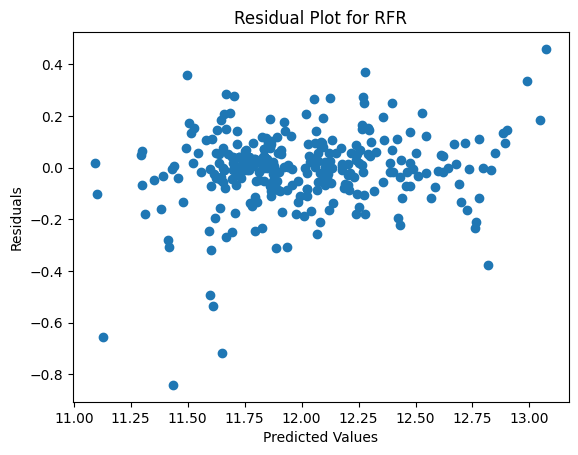

In [68]:
residuals_rfr = y_test - y_pred
plt.scatter(y_pred, residuals_rfr)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for RFR')
plt.show()

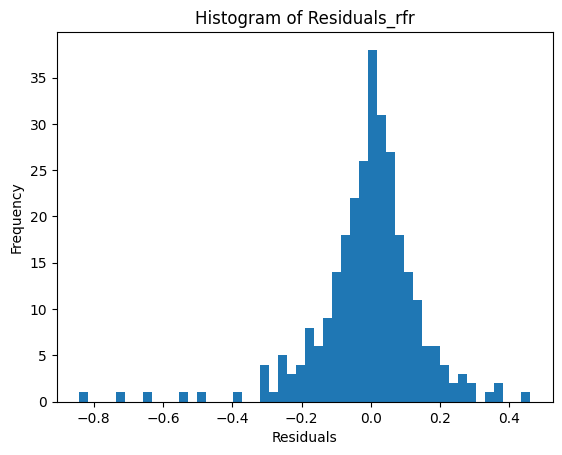

In [70]:
plt.hist(residuals_rfr, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals_rfr')
plt.show()

#Gradient boosting Regressor

In [31]:
gradient_boosting_regressor = GradientBoostingRegressor()

In [32]:
pipeline_gbr = Pipeline ([
    ('feature_selection', from_sel_model),
    ('gradient_boosting_regressor', gradient_boosting_regressor)
])

In [33]:
param_grid = {
    'feature_selection__estimator__alpha': [0.001, 0.005, 0.01, 0.05],
    'gradient_boosting_regressor__n_estimators': [50, 100, 200, 500],
    'gradient_boosting_regressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradient_boosting_regressor__max_depth': [3, 5, 10]
}

grid_search_gbr = GridSearchCV(pipeline_gbr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection',
                                        SelectFromModel(estimator=Ridge(random_state=0))),
                                       ('gradient_boosting_regressor',
                                        GradientBoostingRegressor())]),
             param_grid={'feature_selection__estimator__alpha': [0.001, 0.005,
                                                                 0.01, 0.05],
                         'gradient_boosting_regressor__learning_rate': [0.05,
                                                                        0.1,
                                                                        0.2,
                                                                        0.3],
                         'gradient_boosting_regressor__max_depth': [3, 5, 10],
                         'gradient_boosting_regressor__n_estimators': [50, 100,
                                                                       200,
                                                                       500]},
             scoring='neg_mean_squared_error')

In [34]:
print("Best parameters:", grid_search_gbr.best_params_)
print("Best score:", grid_search_gbr.best_score_)

Best parameters: {'feature_selection__estimator__alpha': 0.05, 'gradient_boosting_regressor__learning_rate': 0.05, 'gradient_boosting_regressor__max_depth': 3, 'gradient_boosting_regressor__n_estimators': 500}
Best score: -0.019471306357314835


In [61]:
from_sel_model_grid_gbr = SelectFromModel(Ridge(alpha =0.05, random_state=0))
from_sel_model_grid_gbr.fit(X_train, y_train)

SelectFromModel(estimator=Ridge(alpha=0.05, random_state=0))

In [62]:
selected_feat_gbr = X_train.columns[(from_sel_model_grid_gbr.get_support())]
selected_feat_gbr

Index(['MSZoning', 'LotArea', 'Utilities', 'Condition2', 'OverallQual',
       'OverallCond', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 'GarageCars',
       'ScreenPorch', 'PoolArea', 'PoolQC'],
      dtype='object')

In [63]:
X_train_gbr = X_train[selected_feat_gbr]
X_test_gbr = X_test[selected_feat_gbr]

In [64]:
gbr = GradientBoostingRegressor(learning_rate = 0.05, max_depth = 3, n_estimators= 500)
gbr.fit(X_train_gbr, y_train)

GradientBoostingRegressor(learning_rate=0.05, n_estimators=500)

In [65]:
y_pred_gbr = gbr.predict(X_test_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f'Mean Absolute Error: {mae_gbr:.2f}')
r2_score_gbr = r2_score(y_test, y_pred_gbr)
print(f'R2 Score: {r2_score_gbr:.2f}')

Mean Absolute Error: 0.09
R2 Score: 0.90


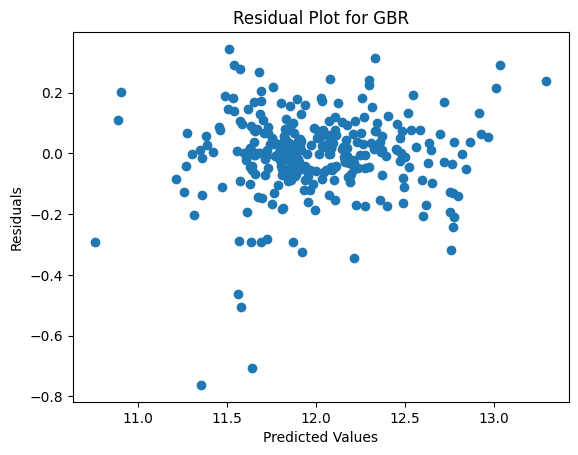

In [67]:
residuals_gbr = y_test - y_pred_gbr
plt.scatter(y_pred_gbr, residuals_gbr)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for GBR')
plt.show()

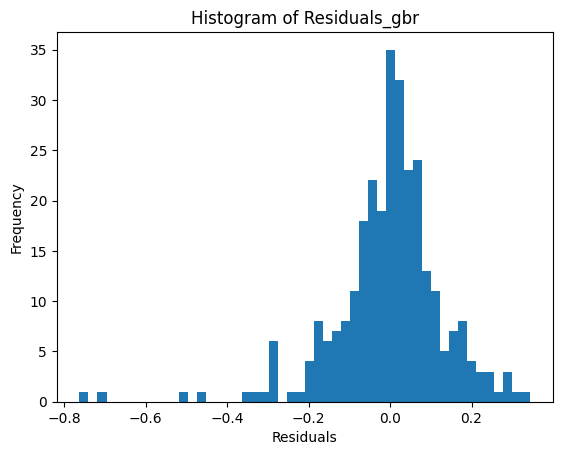

In [71]:
plt.hist(residuals_gbr, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals_gbr')
plt.show()